In [1]:
# Primeiro carregue as imagens compactadas no notebook do collab
# Autorize o Collab a acessar seus arquivos no drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import os

# Imports para redes neurais
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, MaxPooling2D
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Imports para processamento de imagem
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
import imageio
import cv2

# Leitura do Dataset e Pré-processamento das Imagens

In [3]:
DIMENSION_SIZE=256

In [4]:
imagePath = '/content/drive/Shareddrives/PDI/dataset/color/'
X = []
Y = []
names = []

i=0
for filename in os.listdir(imagePath):
    i = i + 1

    image = imageio.imread(imagePath+filename)
    # Alterando dimensao da imagem
    image = cv2.resize(image, dsize=(DIMENSION_SIZE, DIMENSION_SIZE), interpolation=cv2.INTER_CUBIC)
    image = np.array(img_to_array(image), dtype=float)

    # Conversao de espaço de cores para Lab
    # X contem canal L e Y os canais de cor a e b
    varX = rgb2lab(1.0/255*image)[:,:,0]
    varX = varX.reshape(1, DIMENSION_SIZE, DIMENSION_SIZE, 1)
    varY = rgb2lab(1.0/255*image)[:,:,1:]
    varY /= 128
    varY = varY.reshape(1, DIMENSION_SIZE, DIMENSION_SIZE, 2)

    X.append(varX)
    Y.append((varY, filename))

    # Usando 300 imagens inicialmente para evitar longos tempos de execução
    if i >= 300:
        break


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)
y_test, test_filenames = zip(*y_test)
y_train, test_filenames = zip(*y_train)


X_train = np.array(X_train).reshape(len(X_train), DIMENSION_SIZE, DIMENSION_SIZE, 1)
y_train = np.array(y_train).reshape(len(X_train), DIMENSION_SIZE, DIMENSION_SIZE, 2)
X_test = np.array(X_test).reshape(len(X_test), DIMENSION_SIZE, DIMENSION_SIZE, 1)
y_test = np.array(y_test).reshape(len(X_test), DIMENSION_SIZE, DIMENSION_SIZE, 2)

# Definição e treinamento do Modelo de Redes Neurais

In [19]:
# Definição do Modelo
model = Sequential()
model.add(InputLayer(input_shape=(DIMENSION_SIZE, DIMENSION_SIZE, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

model.compile(optimizer='rmsprop',loss='huber_loss')

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 256, 256, 128)     1280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 128, 32)      36896     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 64, 16)       

In [21]:
# Treinamento do Modelo
model.fit(X_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
270/270 [==============================] - 6s 18ms/step - loss: 0.0072
Epoch 2/50
270/270 [==============================] - 5s 17ms/step - loss: 0.0059
Epoch 3/50
270/270 [==============================] - 5s 17ms/step - loss: 0.0060
Epoch 4/50
270/270 [==============================] - 5s 17ms/step - loss: 0.0054
Epoch 5/50
270/270 [==============================] - 5s 17ms/step - loss: 0.0057
Epoch 6/50
270/270 [==============================] - 5s 17ms/step - loss: 0.0055
Epoch 7/50
270/270 [==============================] - 5s 17ms/step - loss: 0.0055
Epoch 8/50
270/270 [==============================] - 5s 17ms/step - loss: 0.0050
Epoch 9/50
270/270 [==============================] - 5s 17ms/step - loss: 0.0045
Epoch 10/50
270/270 [==============================] - 5s 17ms/step - loss: 0.0057
Epoch 11/50
270/270 [==============================] - 5s 17ms/step - loss: 0.0049
Epoch 12/50
270/270 [==============================] - 5s 17ms/step - loss: 0.0060
Epoch 13/50
2

In [22]:
# Avaliação do modelo
model.evaluate(X_test, y_test, batch_size=1)

30/30 [==============================] - 1s 6ms/step - loss: 0.0051


0.00514604477211833

# Colorização das Imagens

In [36]:
# Colorização
# Logica para salvar imagens de saída no drive
#image_out_path = '/content/drive/MyDrive/dataset/landscape Images/output/'

#for i, image in enumerate(X_test):
#    image_for_test = X_test[i].reshape(1, DIMENSION_SIZEENSION_SIZE, DIMENSION_SIZE, 1)
#    output = model.predict(image_for_test)
#    output *= 128

    # Junção de Canais de Cor com Luminosidade
#    coloredImage = np.zeros((DIMENSION_SIZE, DIMENSION_SIZE, 3))
#    coloredImage[:,:,0] = image_for_test[0][:,:,0]
#    coloredImage[:,:,1:] = output[0]
#    coloredImage = lab2rgb(coloredImage)

#    coloredImage *= 255
    #imageio.imwrite(image_out_path+test_filenames[i], coloredImage)

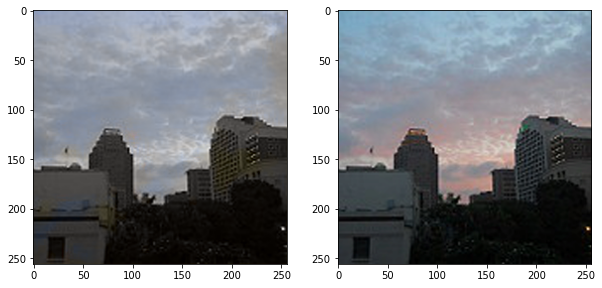

In [27]:
from matplotlib import pyplot as plt
# Gerando exemplos unitários de saída para observação
i = 5

image_for_test = X_test[i].reshape(1, DIMENSION_SIZE, DIMENSION_SIZE, 1)
output = model.predict(image_for_test)
output *= 128

coloredImage = np.zeros((DIMENSION_SIZE, DIMENSION_SIZE, 3))
coloredImage[:,:,0] = image_for_test[0][:,:,0]
coloredImage[:,:,1:] = output[0]
coloredImage = lab2rgb(coloredImage)
coloredImage *= 255
coloredImage = coloredImage.astype(np.uint8)

referenceImage = np.zeros((DIMENSION_SIZE, DIMENSION_SIZE, 3))
referenceImage[:,:,0] = X_test[i][:,:,0]
referenceImage[:,:,1:] = y_test[i]*128

referenceImage = lab2rgb(referenceImage)
referenceImage *= 255
referenceImage = referenceImage.astype(np.uint8)

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(coloredImage)
plt.subplot(1,2,2)
plt.imshow(referenceImage)

In [28]:
def rmse(img_original, img_restored):
    N,M = np.shape(img_original)
    return np.sqrt(np.sum((img_restored - img_original)**2)/(N*M))

meanRMSE_R = 0
meanRMSE_G = 0
meanRMSE_B = 0
for i, image in enumerate(X_test):
    image_for_test = X_test[i].reshape(1, DIMENSION_SIZE, DIMENSION_SIZE, 1)

    output = model.predict(image_for_test)
    output *= 128

    # Junção de Canais de Cor com Luminosidade para a imagem de teste
    coloredImage = np.zeros((DIMENSION_SIZE, DIMENSION_SIZE, 3))
    coloredImage[:,:,0] = image_for_test[0][:,:,0]
    coloredImage[:,:,1:] = output[0]
    # Imagem de teste em RGB
    coloredImage = lab2rgb(coloredImage)
    coloredImage *= 255
    coloredImage = coloredImage.astype(np.uint8)
    
    referenceImage = np.zeros((DIMENSION_SIZE, DIMENSION_SIZE, 3))
    referenceImage[:,:,0] = X_test[i][:,:,0]
    referenceImage[:,:,1:] = y_test[i]*128

    referenceImage = lab2rgb(referenceImage)
    referenceImage *= 255
    referenceImage = referenceImage.astype(np.uint8)

    meanRMSE_R = meanRMSE_R + rmse(referenceImage[:,:,0], coloredImage[:,:,0])
    meanRMSE_G = meanRMSE_G + rmse(referenceImage[:,:,1], coloredImage[:,:,1])
    meanRMSE_B = meanRMSE_B + rmse(referenceImage[:,:,2], coloredImage[:,:,2])

size = len(y_test)
meanRMSE_R = meanRMSE_R/size
meanRMSE_G = meanRMSE_G/size
meanRMSE_B = meanRMSE_B/size
print('média dos RMSE aplicada com a imagem de teste e a imagem original')
print('canal R: ', meanRMSE_R)
print('canal G: ', meanRMSE_G)
print('canal B: ', meanRMSE_B)

média dos RMSE aplicada com a imagem de teste e a imagem original
canal R:  8.595135408353432
canal G:  3.1803453495691416
canal B:  9.330826134682543


In [ ]:
#imageio.imsave('./4p.png', coloredImage)
#imageio.imsave('./4o.png', referenceImage)